In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
mpg = sns.load_dataset('mpg').dropna()

X = mpg[["horsepower"]].values
y = mpg["mpg"].values

In [13]:
X[:5]

array([[130.],
       [165.],
       [150.],
       [150.],
       [140.]])

In [14]:
y[:5]

array([18., 15., 18., 16., 17.])

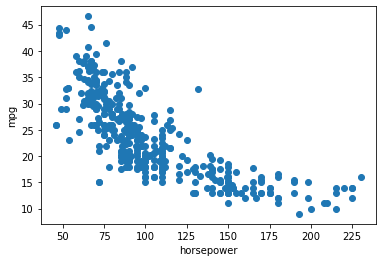

In [15]:
plt.scatter(X, y)
plt.xlabel("horsepower")
plt.ylabel("mpg")
plt.show()

    we want to predict milege on the basis of horsepower

In [16]:
from sklearn.model_selection import train_test_split
# train_test_split -> Random Sampling
np.random.seed(141)

    data
    
        train
            features.csv -> X_train
            target.csv   -> y_train
            
            [train.csv]
        test
            features.csv -> X_test
            target.csv   -> y_test
            
            [test.csv]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=141)

In [18]:
X_train[:5]

array([[ 95.],
       [175.],
       [100.],
       [ 75.],
       [110.]])

In [19]:
y_train[:5]

array([18., 14., 20., 36., 25.])

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
def fit(X, y):
    poly.fit(X)
    X_tr = poly.transform(X)
    model.fit(X_tr, y)

def predict(X):
    X_tr = poly.transform(X)
    y_hat = model.predict(X_tr)
    return y_hat

def error():
    y_hat_train = predict(X_train)
    y_hat_test = predict(X_test)
    train_error = np.sqrt(mean_squared_error(y_train, y_hat_train))
    test_error = np.sqrt(mean_squared_error(y_test, y_hat_test))# RMSE
    print(f"Training Error: {train_error:.2f}")
    print(f"Test Error: {test_error:.2f}")

#### Regularizing Polynomial Models

In [48]:
for d in range(1, 20):
    print("______________________________")
    print("Degree: ", d)
    poly = PolynomialFeatures(degree=d)
    model = LinearRegression()
    fit(X_train, y_train)
    error()
    print("________________________________")

______________________________
Degree:  1
Training Error: 4.86
Test Error: 5.02
________________________________
______________________________
Degree:  2
Training Error: 4.42
Test Error: 4.12
________________________________
______________________________
Degree:  3
Training Error: 4.42
Test Error: 4.10
________________________________
______________________________
Degree:  4
Training Error: 4.41
Test Error: 4.10
________________________________
______________________________
Degree:  5
Training Error: 4.35
Test Error: 4.08
________________________________
______________________________
Degree:  6
Training Error: 4.33
Test Error: 4.07
________________________________
______________________________
Degree:  7
Training Error: 4.35
Test Error: 4.07
________________________________
______________________________
Degree:  8
Training Error: 4.38
Test Error: 4.07
________________________________
______________________________
Degree:  9
Training Error: 4.38
Test Error: 4.06
________________

In [119]:
np.array([[1, 2, 3], [4, 5, 6]]).ravel()

array([1, 2, 3, 4, 5, 6])

In [149]:
X = -6*np.random.random((1000, 1))+3
y = (X**5+X**3*3+X**2*2+0.5*X+np.random.random((1000, 1))*50).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

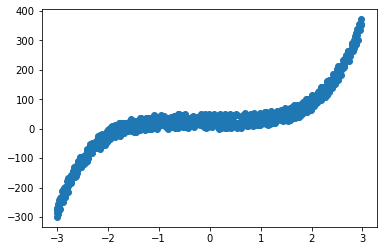

In [150]:
plt.scatter(X_train, y_train)

In [151]:
from sklearn.metrics import r2_score

In [152]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [153]:
# Training Methods
#      Direct Method   
#      SGD Method

poly = PolynomialFeatures(degree=7, include_bias=False) # x^7, x^6, x^5, x^4, x^3, x^2, x
scaler = StandardScaler()

X_train_tr = poly.fit_transform(X_train)
X_test_tr = poly.transform(X_test)

X_train_tr = scaler.fit_transform(X_train_tr)
X_test_tr = scaler.transform(X_test_tr)

In [154]:
# Nomram Equation Direct

model = Ridge(alpha=1, solver="cholesky")

model.fit(X_train_tr, y_train)
train_acc = r2_score(y_train, model.predict(X_train_tr))
test_acc = r2_score(y_test, model.predict(X_test_tr))

print(f"Train: {train_acc:.2f}")
print(f"Test: {test_acc:.2f}")

Train: 0.98
Test: 0.98


In [157]:
for alpha in np.arange(100, 1000, 100):
    #print(alpha)
    model = Ridge(alpha=alpha, solver="cholesky")
    model.fit(X_train_tr, y_train)
    train_acc = r2_score(y_train, model.predict(X_train_tr))
    #test_acc = r2_score(y_test, model.predict(X_test_tr))
    print(f"alpha={alpha} Train: {train_acc:.2f}")
    #print(f"Test: {test_acc:.2f}")

alpha=100 Train: 0.98
alpha=200 Train: 0.98
alpha=300 Train: 0.97
alpha=400 Train: 0.96
alpha=500 Train: 0.96
alpha=600 Train: 0.95
alpha=700 Train: 0.94
alpha=800 Train: 0.93
alpha=900 Train: 0.92


In [158]:
from sklearn.linear_model import SGDRegressor

In [159]:
# Ridge Regression Model
model = SGDRegressor(penalty="l2", alpha=0.0001) # theta^2

In [160]:

for alpha in np.arange(0, 1.2, 0.2):
    #print(alpha)
    # Ridge Regression Model
    model = SGDRegressor(penalty="l2", alpha=alpha, eta0=0.01) # theta^2ion
    model.fit(X_train_tr, y_train)
    train_acc = r2_score(y_train, model.predict(X_train_tr))
    test_acc = r2_score(y_test, model.predict(X_test_tr))
    print(f"alpha={alpha:.2f} Train: {train_acc:.2f} Test: {test_acc:.2f}")
    #print(f"Test: {test_acc:.2f}")

alpha=0.00 Train: 0.98 Test: 0.98
alpha=0.20 Train: 0.98 Test: 0.97
alpha=0.40 Train: 0.97 Test: 0.97
alpha=0.60 Train: 0.96 Test: 0.95
alpha=0.80 Train: 0.95 Test: 0.94
alpha=1.00 Train: 0.93 Test: 0.92


In [163]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

In [182]:
m = 1000
X = -6*np.random.random((m, 1))+3
y = (X**5+X**3*3+X**2*2+0.5*X+np.random.random((m, 1))*(m//10)).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

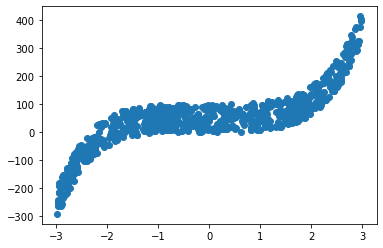

In [183]:
plt.scatter(X_train, y_train)
plt.show()

In [192]:
d = 13
alpha = 2

model = Pipeline([
    ("poly features", PolynomialFeatures(degree=d)),
    ("scaling", StandardScaler()),
    ("ridge SGD", SGDRegressor(penalty="l2", alpha=alpha))
])

model.fit(X_train, y_train)
y_train_hat = model.predict(X_train)
print(r2_score(y_train, y_train_hat))

0.8528105414205388


In [202]:
for alpha in np.arange(0, 3.2, .2):
    d = 7
    model = Pipeline([
        ("poly features", PolynomialFeatures(degree=d)),
        ("scaling", StandardScaler()),
        ("ridge SGD", SGDRegressor(penalty="l2", alpha=alpha))
    ])

    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    train_acc = r2_score(y_test, y_test_hat)
    test_acc = r2_score(y_train, y_train_hat)
    print(f"alpha = {alpha: 0.2f} Train: {train_acc:0.2f} Test: {test_acc:0.2f}")

alpha =  0.00 Train: 0.93 Test: 0.92
alpha =  0.20 Train: 0.93 Test: 0.92
alpha =  0.40 Train: 0.92 Test: 0.91
alpha =  0.60 Train: 0.90 Test: 0.90
alpha =  0.80 Train: 0.89 Test: 0.88
alpha =  1.00 Train: 0.88 Test: 0.88
alpha =  1.20 Train: 0.84 Test: 0.85
alpha =  1.40 Train: 0.84 Test: 0.85
alpha =  1.60 Train: 0.82 Test: 0.83
alpha =  1.80 Train: 0.82 Test: 0.82
alpha =  2.00 Train: 0.77 Test: 0.78
alpha =  2.20 Train: 0.75 Test: 0.77
alpha =  2.40 Train: 0.76 Test: 0.77
alpha =  2.60 Train: 0.75 Test: 0.76
alpha =  2.80 Train: 0.73 Test: 0.75
alpha =  3.00 Train: 0.71 Test: 0.74


In [205]:
# Training Curves 
# GRID SEARCH / RANDOM SEARCH -> Hyper parameter Tuning
for alpha in np.arange(0, 10, 1):
    d = 7
    model = Pipeline([
        ("poly features", PolynomialFeatures(degree=d)),
        ("scaling", StandardScaler()),
        # LASSO Regression
        ("ridge SGD", SGDRegressor(penalty="l1", alpha=alpha, ))
    ])

    model.fit(X_train, y_train)
    y_train_hat = model.predict(X_train)
    y_test_hat = model.predict(X_test)
    train_acc = r2_score(y_test, y_test_hat)
    test_acc = r2_score(y_train, y_train_hat)
    print(f"alpha = {alpha: 0.2f} Train: {train_acc:0.2f} Test: {test_acc:0.2f}")

alpha =  0.00 Train: 0.93 Test: 0.92
alpha =  1.00 Train: 0.93 Test: 0.92
alpha =  2.00 Train: 0.93 Test: 0.92
alpha =  3.00 Train: 0.92 Test: 0.92
alpha =  4.00 Train: 0.92 Test: 0.92
alpha =  5.00 Train: 0.92 Test: 0.91
alpha =  6.00 Train: 0.92 Test: 0.92
alpha =  7.00 Train: 0.92 Test: 0.91
alpha =  8.00 Train: 0.91 Test: 0.91
alpha =  9.00 Train: 0.91 Test: 0.91


### Regression Project 


### Classification

    Logistic Classification